In [36]:
import pandas as pd

In [37]:
df = pd.read_csv(r'C:\Users\jordan\Downloads\housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [38]:
dataset = df.values

In [39]:
X = dataset[:,0:10]

In [40]:
Y = dataset[:,10]

In [41]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [42]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [44]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [45]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [46]:
# Model start

In [47]:
# Got alot of errors because they had wrong imports. This should fix it.
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7240 - accuracy: 0.5000 - val_loss: 0.7027 - val_accuracy: 0.5297
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.5250 - val_loss: 0.6941 - val_accuracy: 0.5251
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5053 - val_loss: 0.6873 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5938 - val_loss: 0.6814 - val_accuracy: 0.6347
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.6570 - val_loss: 0.6759 - val_accuracy: 0.7169
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.7599 - val_loss: 0.6703 - val_accuracy: 0.7443
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.7839 - val_loss: 0.6652 - val_accuracy: 0.7489
Epoch 8/100
3

In [50]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8493


0.8493150472640991

In [51]:
import matplotlib.pyplot as plt

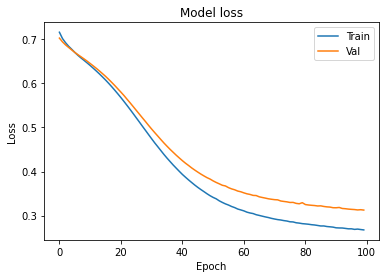

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

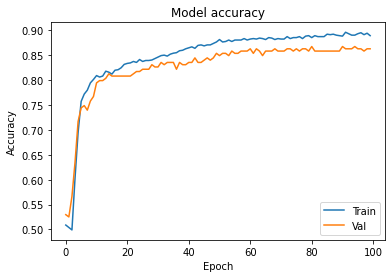

In [55]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [56]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [57]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.5556 - accuracy: 0.6853 - val_loss: 0.3767 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2899 - accuracy: 0.8888 - val_loss: 0.3339 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.8836 - val_loss: 0.3105 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2730 - accuracy: 0.8916 - val_loss: 0.3159 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2641 - accuracy: 0.8913 - val_loss: 0.2777 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2407 - accuracy: 0.8967 - val_loss: 0.4025 - val_accuracy: 0.8356
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.8781 - val_loss: 0.2891 - val_accuracy: 0.8767
Epoch 8/100
3

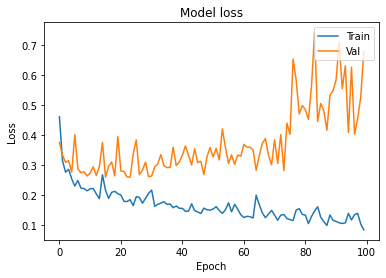

In [59]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

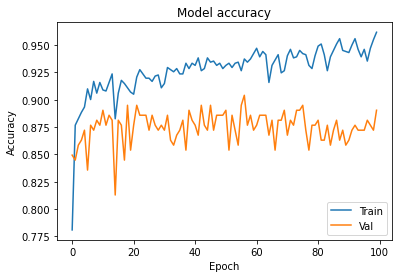

In [61]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [64]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [65]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [66]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 21.1228 - accuracy: 0.5549 - val_loss: 3.9357 - val_accuracy: 0.6758
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 2.4950 - accuracy: 0.8113 - val_loss: 0.6969 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6021 - accuracy: 0.8602 - val_loss: 0.5355 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4905 - accuracy: 0.8904 - val_loss: 0.5202 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4404 - accuracy: 0.9087 - val_loss: 0.4849 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.4799 - accuracy: 0.8623 - val_loss: 0.5018 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.8896 - val_loss: 0.4735 - val_accuracy: 0.8630
Epoch 8/100

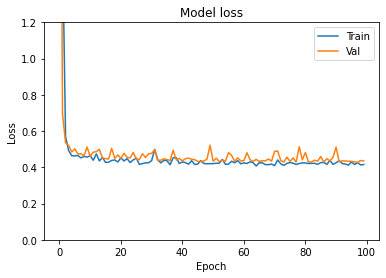

In [68]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

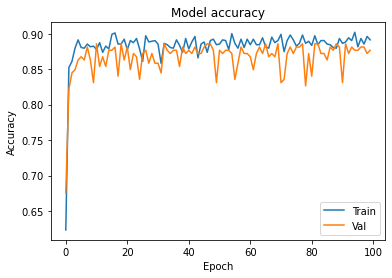

In [70]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [71]:
# This is where it ends but im gonna try the first model with added reg

In [74]:
model_4 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [75]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
hist_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 1.1589 - accuracy: 0.5650 - val_loss: 1.0636 - val_accuracy: 0.7808
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.0407 - accuracy: 0.6578 - val_loss: 0.9647 - val_accuracy: 0.8037
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9447 - accuracy: 0.7291 - val_loss: 0.8832 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8657 - accuracy: 0.7529 - val_loss: 0.8099 - val_accuracy: 0.8219
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7938 - accuracy: 0.7867 - val_loss: 0.7451 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7328 - accuracy: 0.7937 - val_loss: 0.6898 - val_accuracy: 0.8311
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.8342 - val_loss: 0.6453 - val_accuracy: 0.8402
Epoch 8/100
3

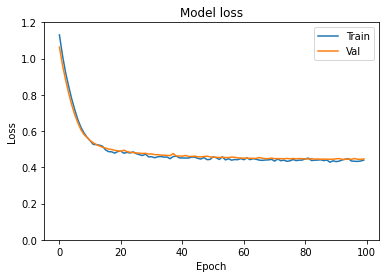

In [77]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

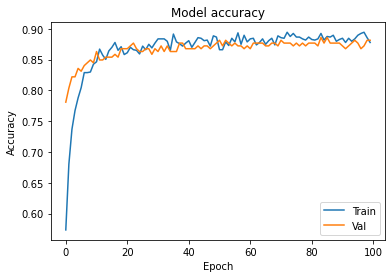

In [78]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [79]:
model_4.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8493


0.8493150472640991

In [ ]:
# Wow look how much better they fit!!!